# eda using dabl

https://amueller.github.io/dabl/dev/user_guide.html#data-cleaning

Currently on version 0.1.6 with many comments about 'future'

Pro:
- BEST feature: quickly lists "useless" fields
- Charts are very fast, but I am unclear how to interpret them

Con:
- Looks like it will dabble in making a quick model, but that's not working for me

In [1]:
!ls ../raw_data

DataDictionaryWiDS2021.csv          SolutionTemplateWiDS2021.csv
DataDictionaryWiDS2021_myNotes.xlsx TrainingWiDS2021.csv
SampleSubmissionWiDS2021.csv        UnlabeledWiDS2021.csv


In [2]:
#!pip install dabl

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
#import pandas_profiling as pp

import dabl

In [4]:
data_dict = pd.read_csv('../raw_data/DataDictionaryWiDS2021.csv')
df_train = pd.read_csv('../raw_data/TrainingWiDS2021.csv')
#df_test  = pd.read_csv('../raw_data/UnlabeledWiDS2021.csv')
#df_submit   = pd.read_csv('../raw_data/SampleSubmissionWiDS2021.csv')
#df_solution = pd.read_csv('../raw_data/SolutionTemplateWiDS2021.csv')

In [5]:
df_train.columns

Index(['Unnamed: 0', 'encounter_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source',
       ...
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'diabetes_mellitus'],
      dtype='object', length=181)

In [6]:
df_clean = dabl.clean(df_train, verbose=1)

Detected feature types:
157 float, 18 int, 6 object, 0 date, 0 other
Interpreted as:
continuous      157
dirty_float       0
low_card_int      2
categorical      10
date              0
free_string       0
useless          12
dtype: int64


/opt/anaconda3/envs/data_circles/lib/python3.7/site-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['icu_stay_type', 'readmission_status', 'arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


### dabl.clean is similar to dabl.detect_types but it seems to return a cleaned dataframe 

It returns a long message in a pink box after the execution code:
    
/opt/anaconda3/envs/data_circles/lib/python3.7/site-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['icu_stay_type', 'readmission_status', 'arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))   

In [7]:
df_detected = dabl.detect_types(df_train,verbose=1)
df_detected

Detected feature types:
157 float, 18 int, 6 object, 0 date, 0 other
Interpreted as:
continuous      157
dirty_float       0
low_card_int      2
categorical      10
date              0
free_string       0
useless          12
dtype: int64


/opt/anaconda3/envs/data_circles/lib/python3.7/site-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['icu_stay_type', 'readmission_status', 'arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
Unnamed: 0,False,False,False,False,False,False,True
encounter_id,True,False,False,False,False,False,False
hospital_id,False,False,True,False,False,False,False
age,True,False,False,False,False,False,False
bmi,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...
immunosuppression,False,False,False,False,False,False,True
leukemia,False,False,False,False,False,False,True
lymphoma,False,False,False,False,False,False,True
solid_tumor_with_metastasis,False,False,False,False,False,False,True


In [8]:
df_detected[df_detected['categorical']]

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
elective_surgery,False,False,False,True,False,False,False
ethnicity,False,False,False,True,False,False,False
gender,False,False,False,True,False,False,False
hospital_admit_source,False,False,False,True,False,False,False
icu_admit_source,False,False,False,True,False,False,False
icu_type,False,False,False,True,False,False,False
apache_post_operative,False,False,False,True,False,False,False
intubated_apache,False,False,False,True,False,False,False
ventilated_apache,False,False,False,True,False,False,False
diabetes_mellitus,False,False,False,True,False,False,False


In [9]:
categorical_cols = df_detected[df_detected['categorical']].index
categorical_cols

Index(['elective_surgery', 'ethnicity', 'gender', 'hospital_admit_source',
       'icu_admit_source', 'icu_type', 'apache_post_operative',
       'intubated_apache', 'ventilated_apache', 'diabetes_mellitus'],
      dtype='object')

In [10]:
categorical_needs_encoding = ['elective_surgery', 'ethnicity', 'gender', 'hospital_admit_source',
       'icu_admit_source', 'icu_type']

In [11]:
for cat in categorical_cols:
    print(f"\n{cat}:")
    print(df_train[cat].value_counts())


elective_surgery:
0    105448
1     24709
Name: elective_surgery, dtype: int64

ethnicity:
Caucasian           100236
African American     13911
Other/Unknown         6261
Hispanic              5049
Asian                 2198
Native American        915
Name: ethnicity, dtype: int64

gender:
M    70518
F    59573
Name: gender, dtype: int64

hospital_admit_source:
Emergency Department    51258
Operating Room          13757
Floor                   11324
Direct Admit             8253
Recovery Room            4563
Other Hospital           2417
Acute Care/Floor         2097
Step-Down Unit (SDU)     1607
PACU                     1031
Other ICU                 283
Chest Pain Center         253
ICU to SDU                 62
ICU                        37
Observation                10
Other                       7
Name: hospital_admit_source, dtype: int64

icu_admit_source:
Accident & Emergency         76846
Operating Room / Recovery    27436
Floor                        21459
Other Hospital    

/opt/anaconda3/envs/data_circles/lib/python3.7/site-packages/dabl/preprocessing.py:352: UserWarning: Discarding near-constant features: ['icu_stay_type', 'readmission_status', 'arf_apache', 'gcs_unable_apache', 'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
  near_constant.index[near_constant].tolist()))


Target looks like classification
Showing only top 10 of 157 continuous features
Linear Discriminant Analysis training set score: 0.631


/opt/anaconda3/envs/data_circles/lib/python3.7/site-packages/dabl/plot/utils.py:373: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/opt/anaconda3/envs/data_circles/lib/python3.7/site-packages/dabl/plot/utils.py:373: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/opt/anaconda3/envs/data_circles/lib/python3.7/site-packages/dabl/plot/utils.py:373: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/opt/anaconda3/envs/data_circles/lib/python3.7/site-packages/dabl/plot/utils.py:373: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/opt/anaconda3/envs/data_circles/lib/python3.7/site-packages/dabl/plot/utils.py:373: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]
/opt/anaconda3/envs/data_circles/li

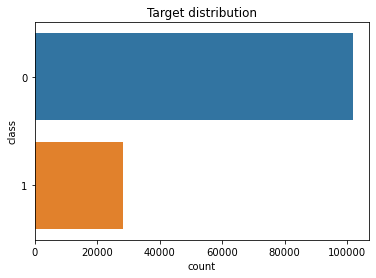

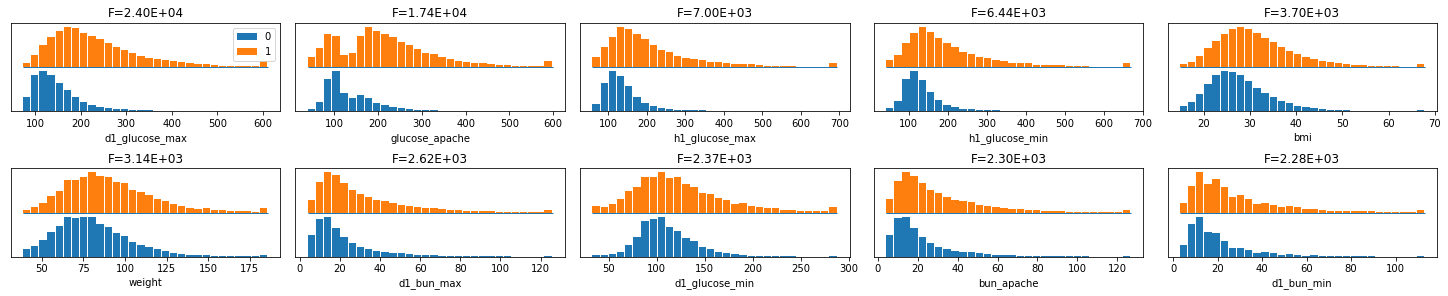

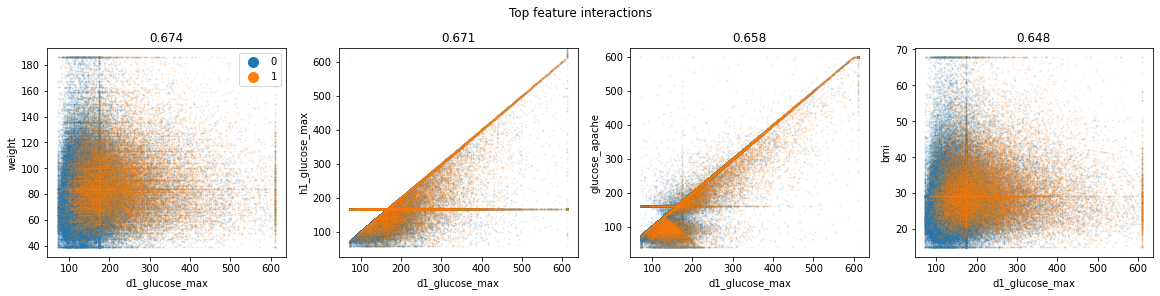

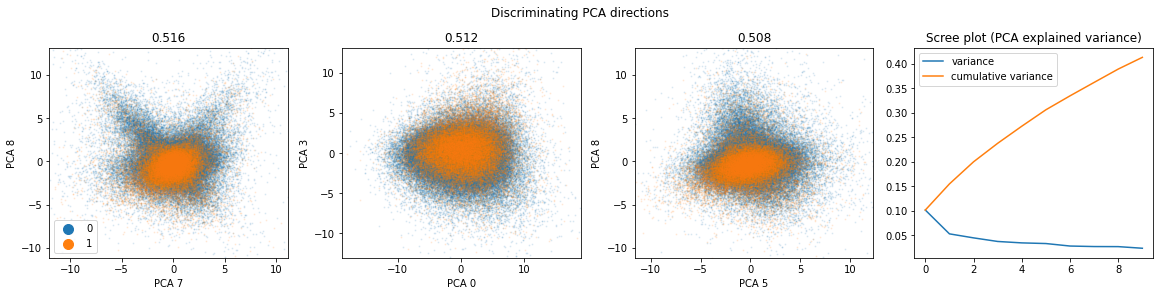

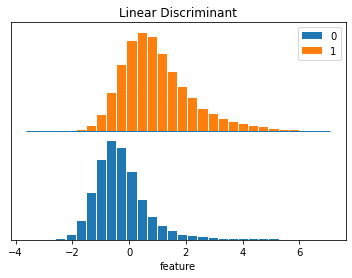

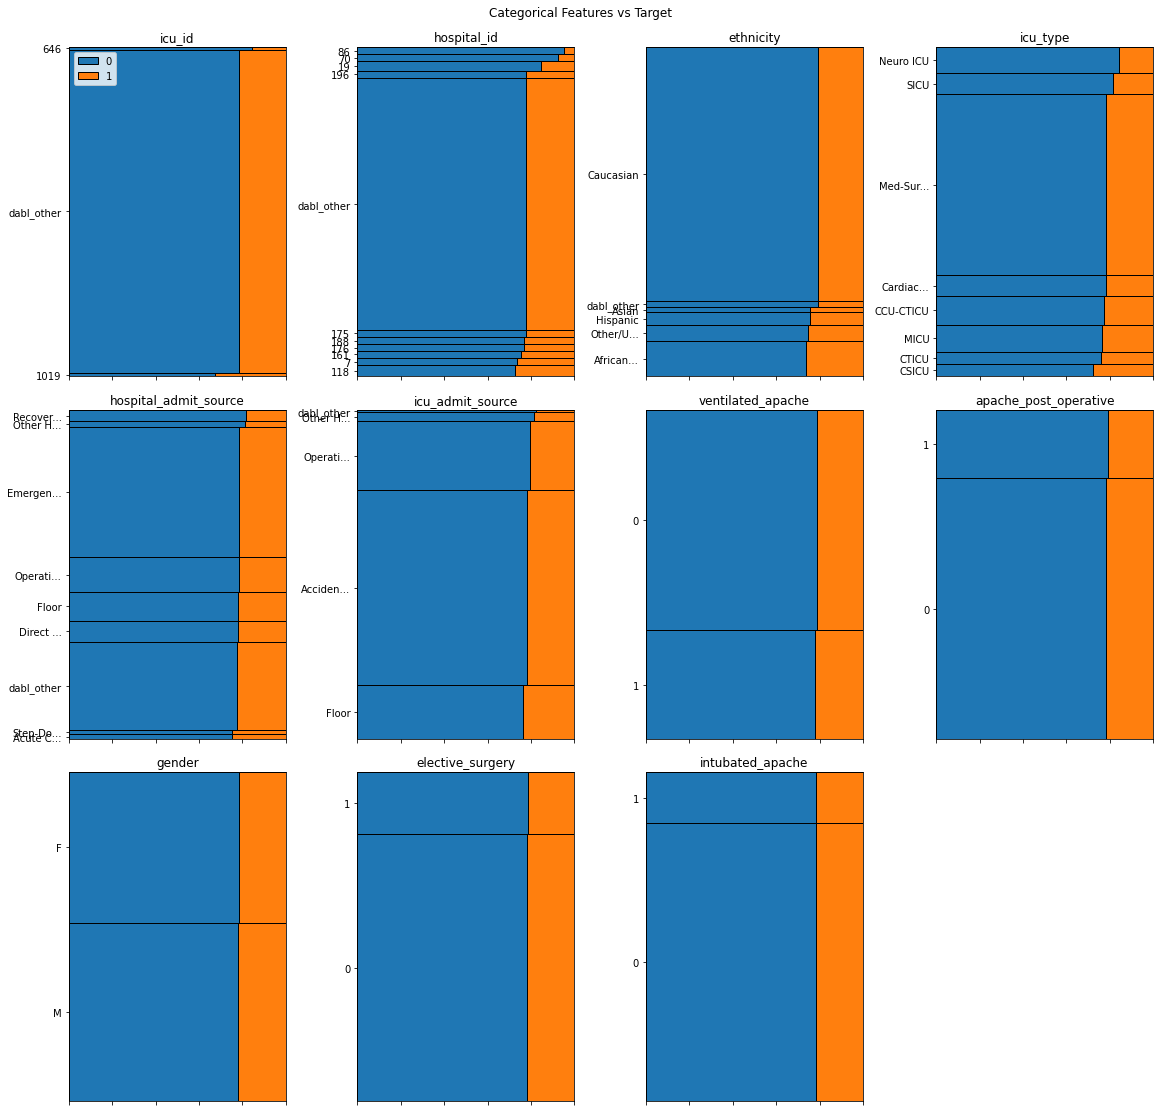

In [12]:
dabl.plot(df_train, target_col="diabetes_mellitus")

In [13]:
df_train['diabetes_mellitus'].value_counts()

0    102006
1     28151
Name: diabetes_mellitus, dtype: int64

In [14]:
# Neither of these worked; dabl is probably not the place to be doing models anyway

#ec = dabl.SimpleClassifier(random_state=0).fit(df_train, target_col="diabetes_mellitus")
#ec = dabl.SimpleRegressor(random_state=0).fit(df_train, target_col="diabetes_mellitus")

In [15]:
# Explain the model
# dabl.explain(ec)